In [2]:
import requests 
from dateutil.relativedelta import relativedelta
import datetime
import pandas as pd
from lxml import etree
import lxml.html as lh
import xml.etree.ElementTree as ET
from bs4 import BeautifulSoup

In [289]:
# end = datetime.datetime.now()
# start = end - relativedelta(years=3)

start = datetime.datetime(day=31, month=7, year=2013)
end = datetime.datetime(day=23, month=9, year=2016)

d = start

while d < end:

    d += datetime.timedelta(days=1)
    date_strs = '%04d%02d%02d' % (d.year, d.month, d.day)

    url = 'https://www.atsenergo.ru/market/stats.xml?period=0&date1='+ date_strs +'&date2=' +  date_strs +'&zone=1&type=graph'
    response = requests.get(url)
#     print(response.status_code)
#     data = response.content
#     print(data)
#     data.decode('utf-8')[:200]
#     tree = ET.ElementTree(ET.fromstring(data.decode('utf-8')))
    soup = BeautifulSoup(response.content,'xml')
    soup = BeautifulSoup(str(soup).replace('</col>', ';</col>'),'xml')

    rsv_df = pd.DataFrame([i.text.split(";")[:-1] for i in soup.find_all('row')], columns=[i.text for i in soup.find_all('name')])

#     print(soup)
    
    url = 'https://www.atsenergo.ru/market/stats.xml?period=0&date1='+ date_strs +'&date2=' +  date_strs +'&zone=2&type=graph'
    response = requests.get(url)
    soup = BeautifulSoup(response.content,'xml')
    soup = BeautifulSoup(str(soup).replace('</col>', ';</col>'),'xml')
    rsv_df_2 = pd.DataFrame([i.text.split(";")[:-1] for i in soup.find_all('row')], columns=[i.text for i in soup.find_all('name')])

    file_path = '/media/xenakas/ext4_drive/data_rsv/rsv_market/' +  str(d.year) +  '/rsv_market_' + date_strs + '.csv'
#     file_path = '/media/xenakas/ext4_drive/data_rsv/rsv_market/' +  'rsv_market_' + date_strs + '.csv'

    
    rsv_df.append(rsv_df_2).to_csv(file_path)

In [305]:
start = datetime.datetime(day=31, month=7, year=2013)
end = datetime.datetime(day=23, month=9, year=2019)

all_rsv_df = pd.DataFrame(columns=['DAT', 'PRICE_ZONE_CODE', 'CONSUMER_VOLUME', 'CONSUMER_PRICE',
       'CONSUMER_RD_VOLUME', 'CONSUMER_SPOT_VOLUME',
       'CONSUMER_PROVIDE_RD', 'CONSUMER_MAX_PRICE', 'CONSUMER_MIN_PRICE',
       'SUPPLIER_VOLUME', 'SUPPLIER_PRICE', 'SUPPLIER_RD_VOLUME',
       'SUPPLIER_SPOT_VOLUME', 'SUPPLIER_PROVIDE_RD',
       'SUPPLIER_MAX_PRICE', 'SUPPLIER_MIN_PRICE', 'HOUR'])

d = start

while d < end:

    d += datetime.timedelta(days=1)
    date_strs = '%04d%02d%02d' % (d.year, d.month, d.day)

    file_path = '/media/xenakas/ext4_drive/data_rsv/rsv_market/' +  str(d.year) +  '/rsv_market_' + date_strs + '.csv'
#     file_path = '/media/xenakas/ext4_drive/data_rsv/rsv_market/' +  'rsv_market_' + date_strs + '.csv'

    
    all_rsv_df = all_rsv_df.append(pd.read_csv(file_path, index_col=0))
    

In [437]:
file_path = '/media/xenakas/ext4_drive/data_rsv/rsv_market/' +  'rsv_market_' + '20130801_20190923' + '.csv'

In [307]:
all_rsv_df.to_csv(file_path)

In [309]:
all_rsv_df.head()

,DAT,PRICE_ZONE_CODE,CONSUMER_VOLUME,CONSUMER_PRICE,CONSUMER_RD_VOLUME,CONSUMER_SPOT_VOLUME,CONSUMER_PROVIDE_RD,CONSUMER_MAX_PRICE,CONSUMER_MIN_PRICE,SUPPLIER_VOLUME,SUPPLIER_PRICE,SUPPLIER_RD_VOLUME,SUPPLIER_SPOT_VOLUME,SUPPLIER_PROVIDE_RD,SUPPLIER_MAX_PRICE,SUPPLIER_MIN_PRICE,HOUR
0,01.08.2013,1,68613.793,1061.53,9552.214,57423.597,27.266,1223.91,707.91,70977.393,1018.87,9838.785,58155.791,510.003,1216.06,707.91,0
1,01.08.2013,1,66010.913,1022.81,9552.214,54759.100,39.652,1170.93,702.82,68312.485,982.87,9838.785,55484.574,503.694,1153.73,702.83,1
2,01.08.2013,1,64571.531,1001.07,9552.214,53286.262,54.665,1171.44,701.41,66821.170,962.80,9838.785,53977.449,484.204,1127.97,701.43,2
3,01.08.2013,1,64172.949,999.50,9552.214,52903.589,64.554,1186.59,697.36,66427.486,960.74,9838.785,53587.255,483.694,1122.88,697.36,3
4,01.08.2013,1,64270.455,986.94,9552.214,53006.707,83.432,1169.99,688.45,66498.112,949.41,9838.785,53664.967,483.720,1105.61,688.45,4


In [313]:
pd.read_csv(file_path, index_col=['PRICE_ZONE_CODE', 'DAT', 'HOUR']).drop('Unnamed: 0', axis=1)

CONSUMER_VOLUME  CONSUMER_PRICE  \
PRICE_ZONE_CODE DAT        HOUR                                    
1               01.08.2013 0           68613.793         1061.53   
                           1           66010.913         1022.81   
                           2           64571.531         1001.07   
                           3           64172.949          999.50   
                           4           64270.455          986.94   
...                                          ...             ...   
2               23.09.2019 19          20951.339          577.81   
                           20          20597.423          498.21   
                           21          20270.274          470.48   
                           22          20276.768          468.74   
                           23          20161.030          452.31   

                                 CONSUMER_RD_VOLUME  CONSUMER_SPOT_VOLUME  \
PRICE_ZONE_CODE DAT        HOUR                                             
1               01.08.2013 0               9552.214             57423.597   
                           1               9552.214             54759.100   
                           2               9552.214             53286.262   
                           3               9552.214             52903.589   
                           4               9552.214             53006.707   
...                                             ...                   ...   
2               23.09.2019 19              1362.228             19157.885   
                           20              1362.228             18748.968   
                           21              1362.228             18420.937   
                           22              1362.228             18431.747   
                           23              1362.228             18311.451   

                                 CONSUMER_PROVIDE_RD  CONSUMER_MAX_PRICE  \
PRICE_ZONE_CODE DAT        HOUR                                            
1               01.08.2013 0                  27.266             1223.91   
                           1                  39.652             1170.93   
                           2                  54.665             1171.44   
                           3                  64.554             1186.59   
                           4                  83.432             1169.99   
...                                              ...                 ...   
2               23.09.2019 19                 80.055             1295.85   
                           20                  7.079             1200.73   
                           21                 17.477             1174.68   
                           22                 21.967             1106.63   
                           23                 22.222              991.45   

                                 CONSUMER_MIN_PRICE  SUPPLIER_VOLUME  \
PRICE_ZONE_CODE DAT        HOUR                                        
1               01.08.2013 0                 707.91        70977.393   
                           1                 702.82        68312.485   
                           2                 701.41        66821.170   
                           3                 697.36        66427.486   
                           4                 688.45        66498.112   
...                                             ...              ...   
2               23.09.2019 19                148.49        21955.045   
                           20                225.35        21676.994   
                           21                232.62        21304.330   
                           22                231.61        21334.207   
                           23                238.55        21206.963   

                                 SUPPLIER_PRICE  SUPPLIER_RD_VOLUME  \
PRICE_ZONE_CODE DAT        HOUR                                       
1               01.08.2013 0            1018.87            9838.785   
       

In [440]:
all_rsv_df_2 = pd.read_csv(file_path).drop('Unnamed: 0', axis=1)

In [442]:
# all_rsv_df_2

In [445]:
all_rsv_df_2 = all_rsv_df_2[~(all_rsv_df_2['HOUR'] == 24)] #перевод времени 2014-10-26 ))))

In [459]:
all_rsv_df_2['DATHOUR'] = [datetime.datetime.strptime(i, '%d.%m.%Y').replace(hour=j) for i,j in zip(all_rsv_df_2['DAT'], all_rsv_df_2['HOUR'])]

/home/xenakas/anaconda3/envs/geoplots3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [463]:
all_rsv_df_2 = all_rsv_df_2.set_index(['DATHOUR','PRICE_ZONE_CODE']).unstack()

In [452]:
all_rsv_df_2['DAT'][107761]

'23.09.2019'

In [457]:
datetime.datetime.strptime(all_rsv_df_2['DAT'][107761], '%d.%m.%Y').replace(hour=3)

2019-09-23 03:00:00


In [422]:
# ind_dh[-10:]

[Timestamp('2019-09-23 14:00:00'),
 Timestamp('2019-09-23 15:00:00'),
 Timestamp('2019-09-23 16:00:00'),
 Timestamp('2019-09-23 17:00:00'),
 Timestamp('2019-09-23 18:00:00'),
 Timestamp('2019-09-23 19:00:00'),
 Timestamp('2019-09-23 20:00:00'),
 Timestamp('2019-09-23 21:00:00'),
 Timestamp('2019-09-23 22:00:00'),
 Timestamp('2019-09-23 23:00:00')]

In [419]:
# all_rsv_df_2.index.get_level_values(1)

DatetimeIndex(['2013-01-08', '2013-01-08', '2013-01-08', '2013-01-08',
               '2013-01-08', '2013-01-08', '2013-01-08', '2013-01-08',
               '2013-01-08', '2013-01-08',
               ...
               '2019-09-23', '2019-09-23', '2019-09-23', '2019-09-23',
               '2019-09-23', '2019-09-23', '2019-09-23', '2019-09-23',
               '2019-09-23', '2019-09-23'],
              dtype='datetime64[ns]', name='DAT', length=107760, freq=None)

In [423]:
all_rsv_df_2 = all_rsv_df_2.set_index([all_rsv_df_2.index.get_level_values(0), ind_dh])

In [425]:
all_rsv_df_2 = all_rsv_df_2.unstack(0)

In [469]:
file_path = '/media/xenakas/ext4_drive/data_rsv/rsv_market/' +  'rsv_market_unstacked_' + '20130801_20190923' + '.csv'

all_rsv_df_2.drop(['DAT','HOUR'], axis=1).to_csv(file_path)

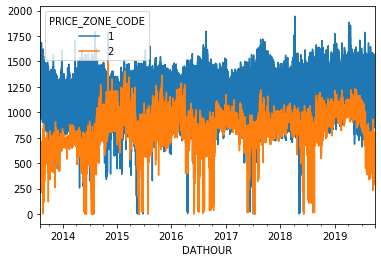

In [464]:
all_rsv_df_2['CONSUMER_PRICE'].plot();

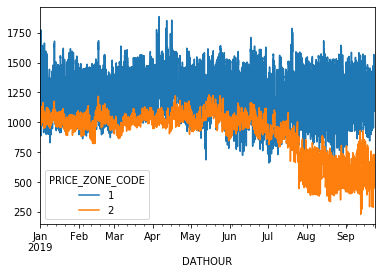

In [466]:
all_rsv_df_2['CONSUMER_PRICE'][all_rsv_df_2.index.year==2019].plot();

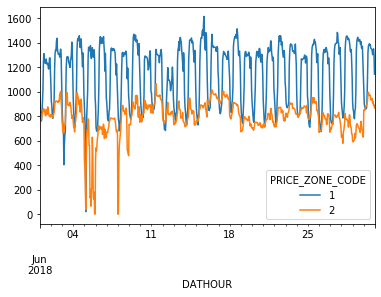

In [477]:
all_rsv_df_2['06/2018']['CONSUMER_PRICE'].plot()

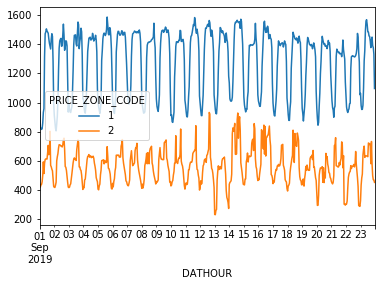

In [476]:
all_rsv_df_2['09/2019']['CONSUMER_PRICE'].plot()

In [3]:
df = pd.read_csv('/media/xenakas/ext4_drive/data_rsv/rsv_market/rsv_market_unstacked_20130801_20190923.csv', header=[0,1], index_col=0, parse_dates=True)

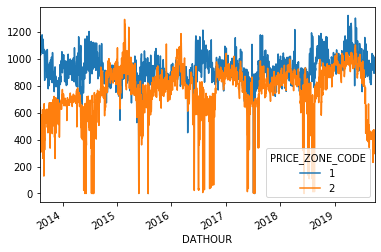

In [17]:
df.loc[df.index.hour == 1,]['CONSUMER_PRICE'].plot()

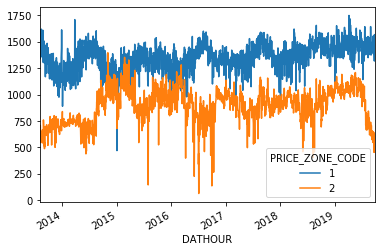

In [18]:
df.loc[df.index.hour == 10,]['CONSUMER_PRICE'].plot()

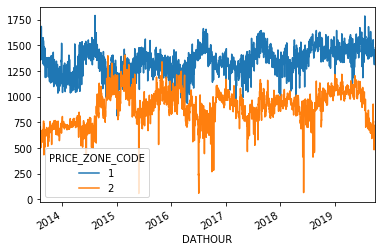

In [19]:
df.loc[df.index.hour == 14,]['CONSUMER_PRICE'].plot()

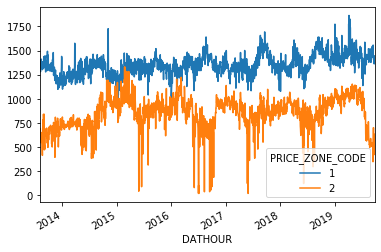

In [20]:
df.loc[df.index.hour == 20,]['CONSUMER_PRICE'].plot()

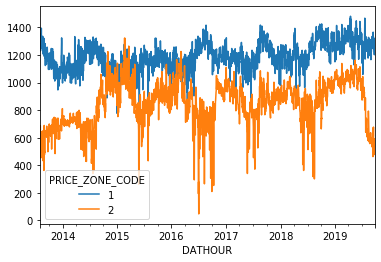

In [6]:
df.resample('d').mean()['CONSUMER_PRICE'].plot();

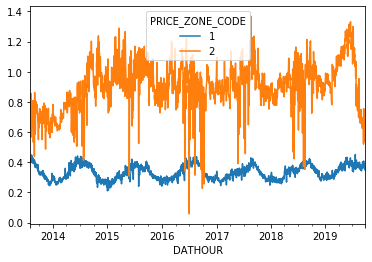

In [38]:
(df['CONSUMER_PRICE']/(df['CONSUMER_VOLUME'])).resample('d').sum().plot()

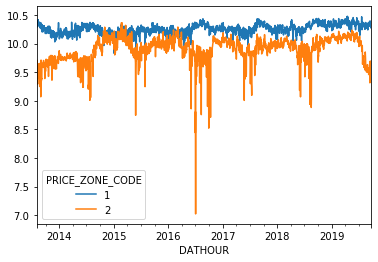

In [41]:
(np.log(df['CONSUMER_PRICE'].resample('d').sum())).plot()

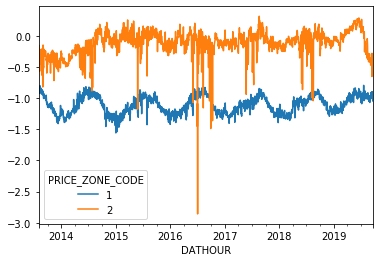

In [42]:
(np.log((df['CONSUMER_PRICE']/(df['CONSUMER_VOLUME'])).resample('d').sum())).plot()

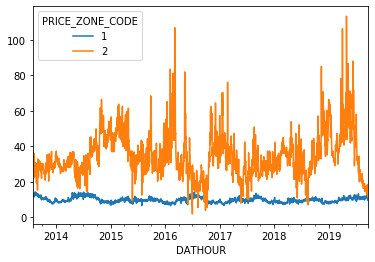

In [29]:
(df['CONSUMER_PRICE']/(df['SUPPLIER_VOLUME']-df['CONSUMER_VOLUME'])).resample('d').sum().plot()

In [43]:
df.columns.levels[0]

Index(['CONSUMER_MAX_PRICE', 'CONSUMER_MIN_PRICE', 'CONSUMER_PRICE',
       'CONSUMER_PROVIDE_RD', 'CONSUMER_RD_VOLUME', 'CONSUMER_SPOT_VOLUME',
       'CONSUMER_VOLUME', 'SUPPLIER_MAX_PRICE', 'SUPPLIER_MIN_PRICE',
       'SUPPLIER_PRICE', 'SUPPLIER_PROVIDE_RD', 'SUPPLIER_RD_VOLUME',
       'SUPPLIER_SPOT_VOLUME', 'SUPPLIER_VOLUME'],
      dtype='object')

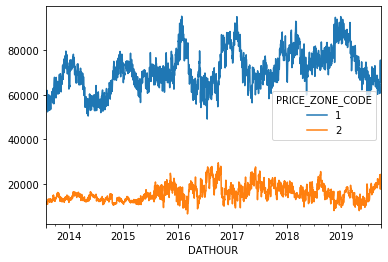

In [49]:
(df['SUPPLIER_VOLUME']-df['CONSUMER_VOLUME']).resample('d').sum().plot()

In [57]:
df['CONSUMER_PRICE']['1'].resample('m').mean().corr((df['SUPPLIER_VOLUME']-df['CONSUMER_VOLUME']).resample('m').sum()['1'])

0.029816026650615224

In [58]:
df['CONSUMER_PRICE']['2'].resample('m').mean().corr((df['SUPPLIER_VOLUME']-df['CONSUMER_VOLUME']).resample('m').sum()['2'])

-0.2794734607103991

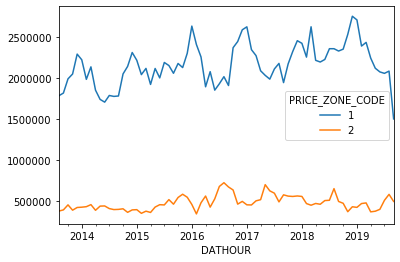

In [50]:
(df['SUPPLIER_VOLUME']-df['CONSUMER_VOLUME']).resample('m').sum().plot()

In [38]:
df.resample('d').mean()['CONSUMER_PRICE']['1'].corr(df.resample('d').mean()['CONSUMER_PRICE']['2'])

0.1292213758927274

In [39]:
df.resample('m').mean()['CONSUMER_PRICE']['1'].corr(df.resample('m').mean()['CONSUMER_PRICE']['2'])

0.07053930597699566

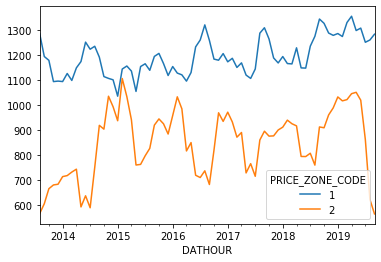

In [26]:
df.resample('m').mean()['CONSUMER_PRICE'].plot()

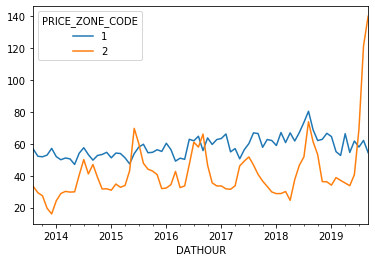

In [61]:
(df.resample('m').mean()['CONSUMER_PRICE'] - df.resample('m').mean()['SUPPLIER_PRICE']).plot()

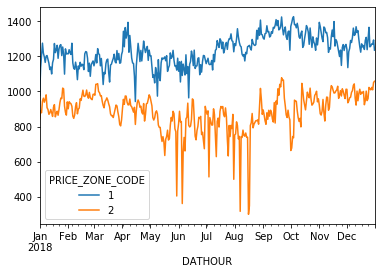

In [25]:
df.resample('d').mean()['2018']['CONSUMER_PRICE'].plot()

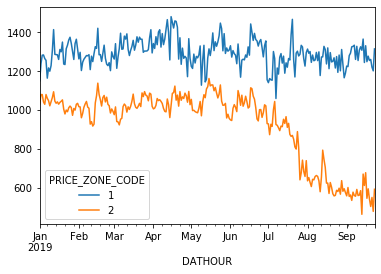

In [24]:
df.resample('d').mean()['2019']['CONSUMER_PRICE'].plot()